<div align="right"><a href="https://github.com/lucasliano/TC2">TCII Github</a></div>

<div align="center">
    <h1>Trabajo Semanal 5</h1>
    <h2>Filtro Pasa Altos Notch con GIC</h2>
    <h3>Liaño, Lucas</h3>
</div>

## Consigna 

>Se debe diseñar un filtro pasa-altos, que presente máxima planicidad en la banda de paso (frecuencia de corte = 300 Hz) y un cero de transmisión en 100 Hz. El prototipo pasabajos normalizado presenta la siguiente respuesta:
> ![Consigna1](Consigna1.png)
>
> - Determine la expresión de H(s) del filtro pasa-altos normalizado                    
> - Realizar el diagrama de polos y ceros de H(s)                                             
> - Sintetice el circuito del filtro pedido. Se utilizará para la estructura de segundo orden el siguiente circuito:
>
> ![Consigna2](Consigna2.png)




# Resolución a Mano

<div class="alert alert-success">
    <strong>Se adjunto PDF con la resolución manual 😊 </strong> 
</div>

 

## Implementación Computarizada

#### Importamos las librerias a utilizar

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from splane import pzmap, grpDelay, bodePlot, convert2SOS
from scipy import signal

# Esta es una liberia tomada de la comunidad [https://stackoverflow.com/questions/35304245/multiply-scipy-lti-transfer-functions?newreg=b12c460c179042b09ad75c2fb4297bc9]
from ltisys import *

# Módulos para Jupyter (mejores graficos!)
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = [12, 4]
plt.rcParams['figure.dpi'] = 150 # 200 e.g. is really fine, but slower

#### Inicializamos las variables utilizadas

### Transferencia Notch Pasa-bajos Normalizada ( Dato )
\begin{equation}
    T(s) = \dfrac{s^{2} + 3^{2}} {s^2 + s + 1}
\end{equation}

### Transferencia Notch Pasa-altos Normalizada (Despues de calcular)
\begin{equation}
    T(s) = \dfrac{s^{2} + (\frac{1}{3})^{2}} {s^2 + s + 1} \cdot \dfrac{s}{s+1}
\end{equation}


In [2]:
# Coeficientes Transferencias LP
wp = 1
Qp = 1
k = 3
wz = k * wp

## Definimos la transferencia a partir de la expresión hallada


In [3]:
# Genero la función transferencia T1 en S
den_1 = [1, (wp / Qp), wp**2]
num_1 = [1, 0, wz**2]
T1 = ltimul(num_1, den_1);

## Diagrama de polos y ceros

### Transferencia $T_{1}(s)$

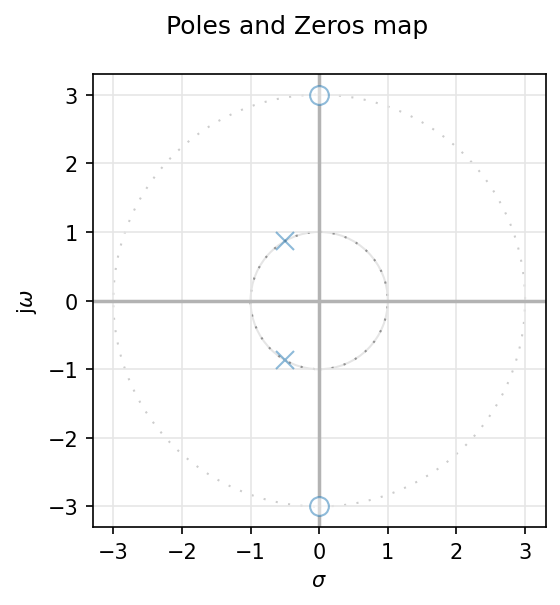

In [4]:
pzmap(T1, 1);

## Diagrama de Bode

### Transferencia $H_{LP}(s)$

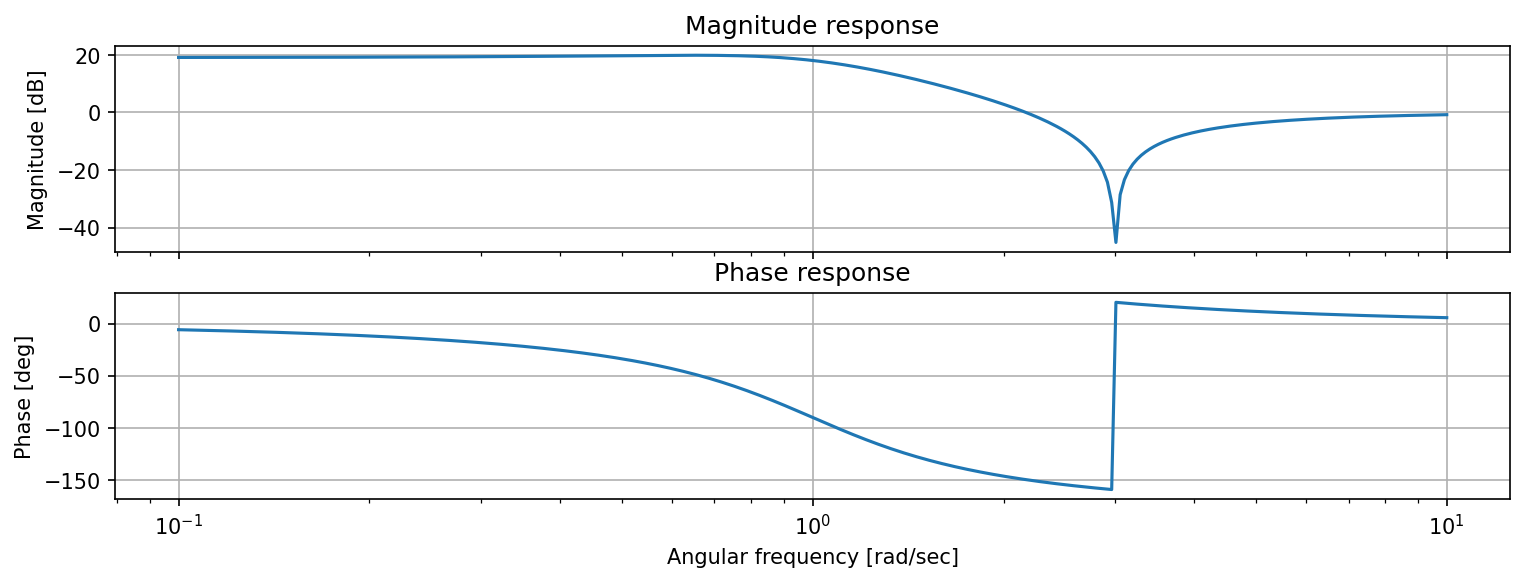

In [5]:
fig, ax = bodePlot(T1.to_ss(), 2);

# Ahora aplicamos la transformación

### Transferencia $H_{HP}(s)$

In [6]:
# Coeficientes Transferencias HP
wp = 1
Qp = 1
k = 1/3
wz = k * wp

sigma = 1

In [7]:
# Genero la función transferencia T1 en S
den_1 = [1, (wp / Qp), wp**2]
num_1 = [1, 0, wz**2]
T1 = ltimul(num_1, den_1);


den_2 = [1, sigma]
num_2 = [1,0]
T2 = ltimul(num_2, den_2);

H = T1 * T2

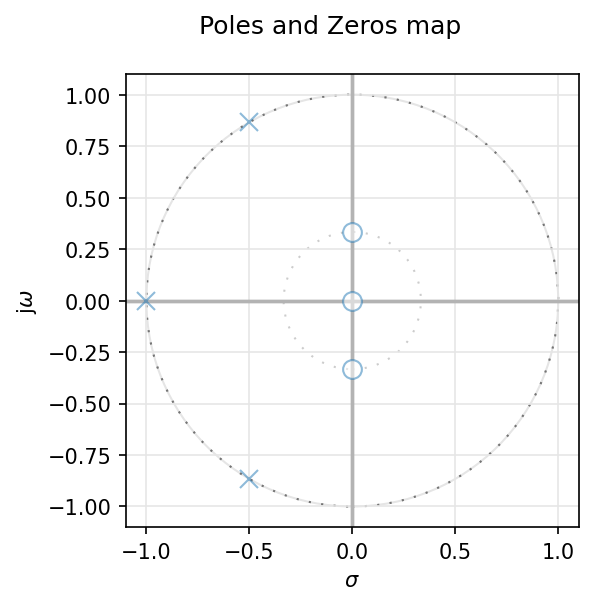

In [8]:
pzmap(H, 1);

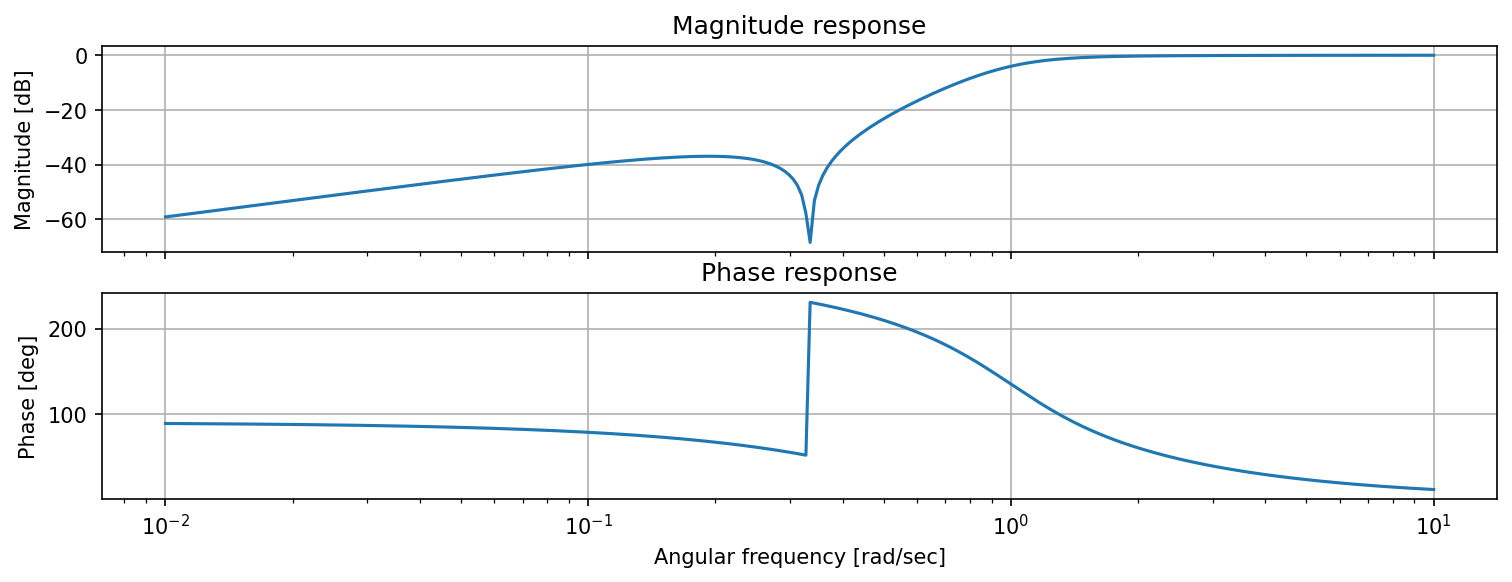

In [9]:
fig, ax = bodePlot(H.to_ss(), 2);

---
# Simulación Circuital

![Simulacion](Simulacion.png)